In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction

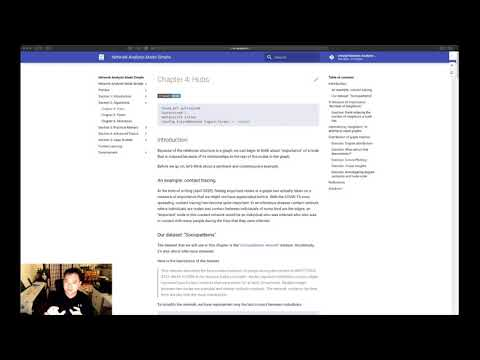

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="-oimHbVDdDA", width=560, height=315)

Because of the relational structure in a graph,
we can begin to think about "importance" of a node
that is induced because of its relationships
to the rest of the nodes in the graph.

Before we go on, let's think about
a pertinent and contemporary example.

### An example: contact tracing

At the time of writing (April 2020),
finding important nodes in a graph has actually taken on a measure of importance
that we might not have appreciated before.
With the COVID-19 virus spreading,
contact tracing has become quite important.
In an infectious disease contact network,
where individuals are nodes and
contact between individuals of some kind are the edges,
an "important" node in this contact network
would be an individual who was infected
who also was in contact with many people
during the time that they were infected.

### Our dataset: "Sociopatterns"

The dataset that we will use in this chapter is the "[sociopatterns network][sociopatterns]" dataset.
Incidentally, it's also about infectious diseases. 

[sociopatterns]: http://www.sociopatterns.org/datasets/infectious-sociopatterns-dynamic-contact-networks/

Note to readers: We originally obtained the dataset in 2014
from the Konect website.
It is unfortunately no longer available.
The sociopatterns.org website hosts an edge list of a slightly different format,
so it will look different from what we have here.

From the original description on Konect, here is the description of the dataset:

> This network describes the face-to-face behavior of people
> during the exhibition INFECTIOUS: STAY AWAY in 2009
> at the Science Gallery in Dublin.
> __Nodes represent exhibition visitors;__
> __edges represent face-to-face contacts that were active for at least 20 seconds.__
> Multiple edges between two nodes are possible and denote multiple contacts.
> The network contains the data from the day with the most interactions.

To simplify the network, we have represented only the last contact between individuals.

In [10]:
# from nams import load_data as cf
import sys
if not (r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple' in sys.path):
    sys.path.insert(0, r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple')
# import load_data as cf 
from nams import load_data as cf
G = cf.load_sociopatterns_network()

It is loaded as an undirected graph object:

In [4]:
type(G)

networkx.classes.graph.Graph

As usual, before proceeding with any analysis,
we should know basic graph statistics.

In [5]:
len(G.nodes()), len(G.edges())
# make sure data not corrupted

(410, 2765)

## A Measure of Importance: "Number of Neighbors"

One measure of importance of a node is
the number of **neighbors** that the node has.
What is a **neighbor**?
We will work with the following definition:

> The neighbor of a node is connected to that node by an edge.

Let's explore this concept, using the NetworkX API.

Every NetworkX graph provides a `G.neighbors(node)` class method,
which lets us query a graph for the number of neighbors
of a given node:

In [6]:
G.neighbors(7)

It returns a generator that doesn't immediately return
the exact neighbors list.
This means we cannot know its exact length,
as it is a generator.
If you tried to do:

```python
len(G.neighbors(7))
```

you would get the following error:

```python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-13-72c56971d077> in <module>
----> 1 len(G.neighbors(7))

TypeError: object of type 'dict_keyiterator' has no len()
```

Hence, we will need to cast it as a list in order to know
both its length
and its members:

In [8]:
list(G.neighbors(9))

[3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 19, 26, 39]

In [16]:
G.neighbors??

In the event that some nodes have an extensive list of neighbors,
then using the `dict_keyiterator` is potentially a good memory-saving technique,
as it lazily yields the neighbors.

### Exercise: Rank-ordering the number of neighbors a node has

Since we know how to get the list of nodes that are neighbors of a given node,
try this following exercise:

> Can you create a ranked list of the importance of each individual, based on the number of neighbors they have?

Here are a few hints to help:

- You could consider using a `pandas Series`. This would be a modern and idiomatic way of approaching the problem.
- You could also consider using Python's `sorted` function.

In [13]:
from nams.solutions.hubs import rank_ordered_neighbors
#### REPLACE THE NEXT FEW LINES WITH YOUR ANSWER
answer = rank_ordered_neighbors(G)
answer

51     50
272    47
235    43
195    43
265    34
       ..
390     1
135     1
398     1
186     1
98      1
Length: 410, dtype: int64

In [19]:
import pandas as pd

In [20]:
answer = [len(list(G.neighbors(node))) for node in G.nodes()]
answer = pd.Series(answer, index=list(G.nodes()))
answer = answer.sort_values(ascending=False)

In [21]:
answer

51     50
272    47
235    43
195    43
265    34
       ..
390     1
135     1
398     1
186     1
98      1
Length: 410, dtype: int64

The original implementation looked like the following

In [22]:
from nams.solutions.hubs import rank_ordered_neighbors_original
# rank_ordered_neighbors_original??

In [25]:
rank_ordered_neighbors_original(G)

[51,
 272,
 235,
 195,
 161,
 219,
 265,
 181,
 50,
 292,
 122,
 148,
 288,
 294,
 188,
 100,
 299,
 171,
 199,
 264,
 257,
 261,
 240,
 297,
 293,
 359,
 103,
 112,
 230,
 198,
 287,
 42,
 291,
 296,
 132,
 207,
 259,
 298,
 197,
 229,
 231,
 260,
 345,
 95,
 183,
 117,
 165,
 202,
 283,
 237,
 258,
 281,
 282,
 295,
 105,
 113,
 177,
 154,
 179,
 206,
 232,
 284,
 262,
 227,
 74,
 314,
 120,
 169,
 164,
 173,
 174,
 238,
 196,
 239,
 318,
 93,
 109,
 125,
 118,
 233,
 156,
 263,
 285,
 91,
 124,
 175,
 144,
 300,
 301,
 341,
 356,
 389,
 367,
 87,
 94,
 110,
 133,
 123,
 121,
 126,
 149,
 215,
 335,
 348,
 146,
 178,
 160,
 204,
 176,
 200,
 44,
 378,
 104,
 129,
 127,
 228,
 152,
 153,
 157,
 158,
 244,
 312,
 236,
 241,
 266,
 267,
 340,
 41,
 37,
 400,
 97,
 102,
 134,
 12,
 16,
 140,
 226,
 155,
 170,
 210,
 71,
 346,
 354,
 376,
 379,
 386,
 106,
 108,
 128,
 115,
 168,
 225,
 162,
 308,
 201,
 39,
 307,
 328,
 333,
 355,
 358,
 371,
 78,
 90,
 96,
 11,
 172,
 214,
 163,
 208,
 

And another implementation that uses generators:

In [26]:
from nams.solutions.hubs import rank_ordered_neighbors_generator
# rank_ordered_neighbors_generator??

In [27]:
rank_ordered_neighbors_generator(G)

[(50, 51),
 (47, 272),
 (43, 235),
 (43, 195),
 (34, 265),
 (34, 219),
 (34, 161),
 (33, 292),
 (33, 181),
 (33, 50),
 (32, 122),
 (31, 294),
 (31, 288),
 (31, 148),
 (30, 188),
 (29, 299),
 (29, 100),
 (28, 264),
 (28, 257),
 (28, 199),
 (28, 171),
 (27, 359),
 (27, 297),
 (27, 293),
 (27, 261),
 (27, 240),
 (26, 296),
 (26, 291),
 (26, 287),
 (26, 230),
 (26, 198),
 (26, 112),
 (26, 103),
 (26, 42),
 (25, 345),
 (25, 298),
 (25, 260),
 (25, 259),
 (25, 231),
 (25, 229),
 (25, 207),
 (25, 197),
 (25, 132),
 (25, 95),
 (24, 295),
 (24, 283),
 (24, 282),
 (24, 281),
 (24, 258),
 (24, 237),
 (24, 202),
 (24, 183),
 (24, 165),
 (24, 117),
 (23, 314),
 (23, 284),
 (23, 262),
 (23, 232),
 (23, 227),
 (23, 206),
 (23, 179),
 (23, 177),
 (23, 154),
 (23, 113),
 (23, 105),
 (23, 74),
 (22, 318),
 (22, 239),
 (22, 238),
 (22, 196),
 (22, 174),
 (22, 173),
 (22, 169),
 (22, 164),
 (22, 120),
 (22, 93),
 (21, 285),
 (21, 263),
 (21, 233),
 (21, 156),
 (21, 125),
 (21, 118),
 (21, 109),
 (21, 91),

## Generalizing "neighbors" to arbitrarily-sized graphs

The concept of neighbors is simple and appealing,
but it leaves us with a slight point of dissatisfaction:
it is difficult to compare graphs of different sizes.
Is a node more important solely because it has more neighbors?
What if it were situated in an extremely large graph?
Would we not expect it to have more neighbors?

As such, we need a normalization factor.
One reasonable one, in fact, is
_the number of nodes that a given node could **possibly** be connected to._
By taking the ratio of the number of neighbors a node has
to the number of neighbors it could possibly have,
we get the **degree centrality** metric.

Formally defined, the degree centrality of a node (let's call it $d$)
is the number of neighbors that a node has (let's call it $n$)
divided by the number of neighbors it could _possibly_ have (let's call it $N$):

$$d = \frac{n}{N}$$

NetworkX provides a function for us to calculate degree centrality conveniently:

__Note tha self loop is NOT allowed here__

In [28]:
import networkx as nx
import pandas as pd
dcs = pd.Series(nx.degree_centrality(G))
dcs

100    0.070905
101    0.031785
102    0.039120
103    0.063570
104    0.041565
         ...   
89     0.009780
91     0.051345
96     0.036675
99     0.034230
98     0.002445
Length: 410, dtype: float64

In [34]:
len(list(G.neighbors(100)))

29

In [31]:
dcs*(len(G.nodes())-1)

100    29.0
101    13.0
102    16.0
103    26.0
104    17.0
       ... 
89      4.0
91     21.0
96     15.0
99     14.0
98      1.0
Length: 410, dtype: float64

`nx.degree_centrality(G)` returns to us a dictionary of key-value pairs,
where the keys are node IDs
and values are the degree centrality score.
To save on output length, I took the liberty of casting it as a pandas Series
to make it easier to display.

Incidentally, we can also sort the series
to find the nodes with the highest degree centralities:

In [35]:
dcs.sort_values(ascending=False)

51     0.122249
272    0.114914
235    0.105134
195    0.105134
265    0.083130
         ...   
390    0.002445
135    0.002445
398    0.002445
186    0.002445
98     0.002445
Length: 410, dtype: float64

Does the list order look familiar?
It should, since the numerator of the degree centrality metric
is identical to the number of neighbors,
and the denominator is a constant.

## Distribution of graph metrics

One important concept that you should come to know
is that the distribution of node-centric values
can characterize classes of graphs.

What do we mean by "distribution of node-centric values"?
One would be the degree distribution,
that is, the collection of node degree values in a graph.

Generally, you might be familiar with plotting a histogram
to visualize distributions of values,
but in this book, we are going to avoid histograms like the plague.
I detail a lot of reasons in a [blog post][ecdf] I wrote in 2018,
but the main points are that:

1. It's easier to lie with histograms, i.e., how you bin your data affects your interpretation.
1. You get informative statistical information (median, IQR, extremes/outliers)
more easily.

[ecdf]: https://ericmjl.github.io/blog/2018/7/14/ecdfs/

### Exercise: Degree distribution

In this next exercise, we are going to get practice visualizing these values
using empirical cumulative distribution function plots.

I have written for you an ECDF function that you can use already.
Its API looks like the following:

```python
x, y = ecdf(list_of_values)
```

giving you `x` and `y` values that you can directly plot.

The exercise prompt is this:

> Plot the ECDF of the degree centrality and degree distributions.

First do it for **degree centrality**:

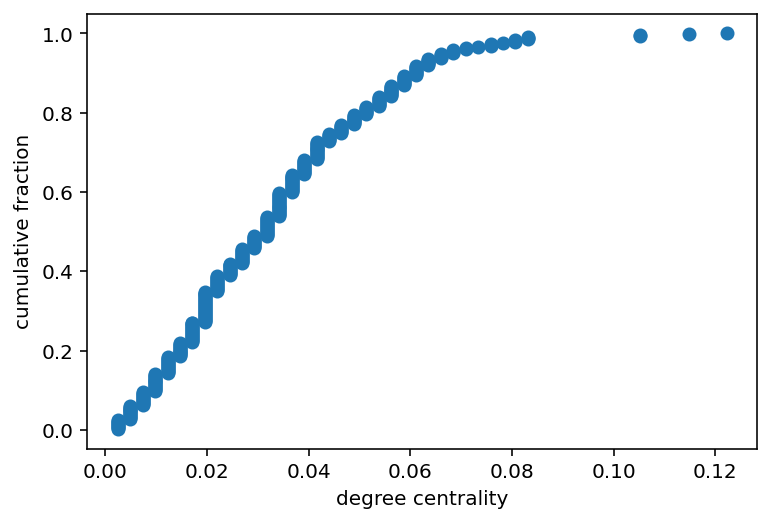

In [40]:
# from nams.functions import ecdf
from nams.solutions.hubs import ecdf_degree_centrality

#### REPLACE THE FUNCTION CALL WITH YOUR ANSWER
ecdf_degree_centrality(G)

In [56]:
import seaborn as sns
sns.set()

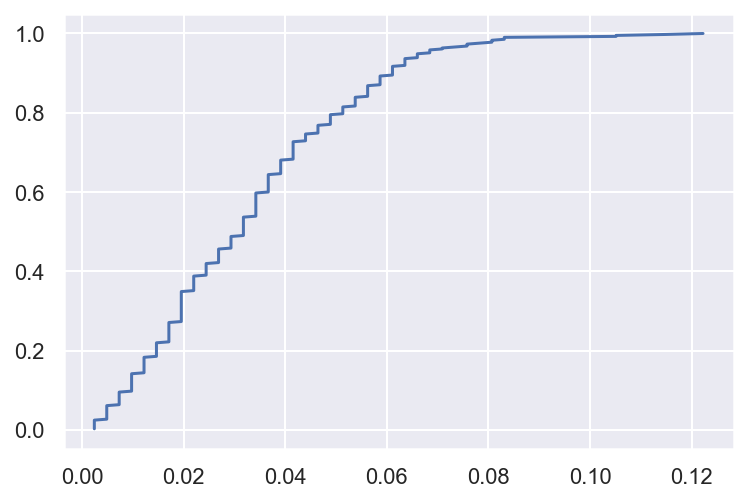

In [65]:
from nams.functions import ecdf
import matplotlib.pyplot as plt

x, y = ecdf(list(dcs))
fig, ax = plt.subplots()
ax.plot(x, y)
# sns.scatterplot(x=x,y=y, ax=ax)
plt.show()

Note:
> `Median` can be easily identify located at intersection of the `ecdf` curve and line $y=0.5$<br>
> `IQR` 75 percentile and 25 percentile<br>
> From scatterplot, you can see potential upper $3$ outliers<br>
> `Peak values` those with sudden change vertically (y value)

Now do it for **degree**:

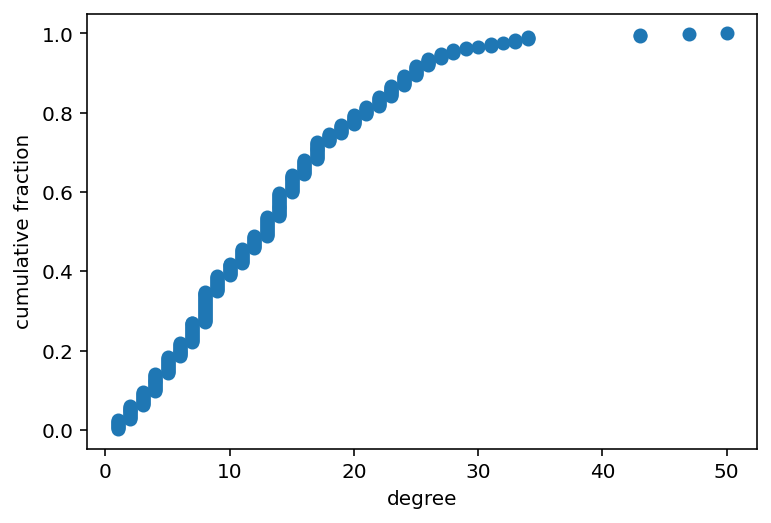

In [55]:
from nams.solutions.hubs import ecdf_degree

#### REPLACE THE FUNCTION CALL WITH YOUR ANSWER
ecdf_degree(G)

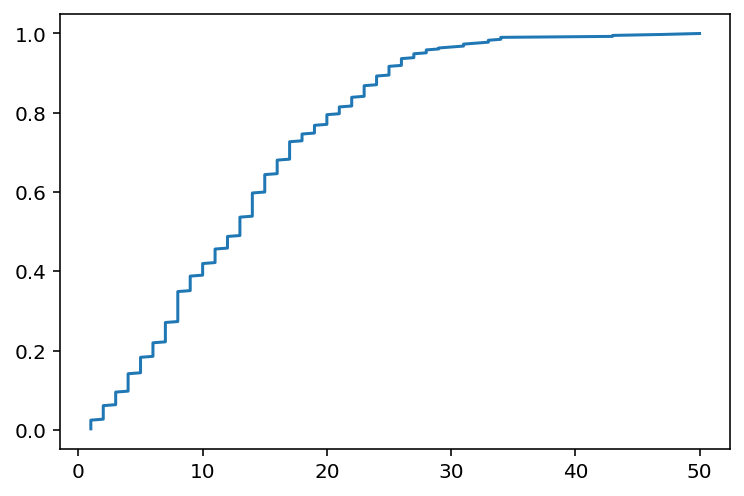

In [54]:
import numpy as np
x, y = ecdf(np.array(G.degree(list(G.nodes())))[:,1])
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

The fact that they are identically-shaped
should not surprise you!

### Exercise: What about that denominator?

The denominator $N$ in the degree centrality definition
is "the number of nodes that a node could _possibly_ be connected to".
Can you think of two ways $N$ be defined?

In [ ]:
from nams.solutions.hubs import num_possible_neighbors

#### UNCOMMENT TO SEE MY ANSWER
# print(num_possible_neighbors())

### Exercise: Circos Plotting

Let's get some practice with the `nxviz` API.

> Visualize the graph `G`, while ordering and colouring them by the 'order' node attribute.

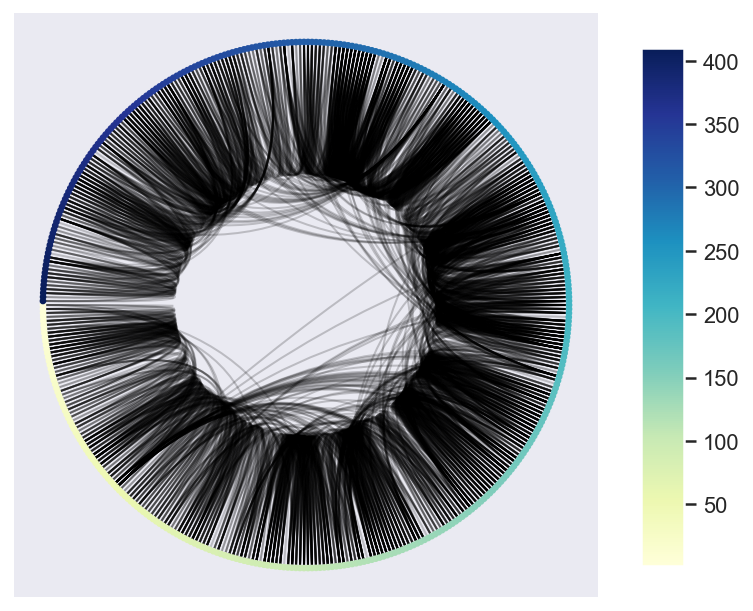

In [67]:
from nams.solutions.hubs import circos_plot

#### REPLACE THE NEXT LINE WITH YOUR ANSWER
circos_plot(G)

And here's an alternative view using an arc plot.

In [66]:
import nxviz as nv
nv.arc(G, sort_by="order", node_color_by="order")

AttributeError: module 'nxviz' has no attribute 'arc'

### Exercise: Visual insights

Since we know that node colour and order
are by the "order" in which the person entered into the exhibit,
what does this visualization tell you?

In [68]:
from nams.solutions.hubs import visual_insights

#### UNCOMMENT THE NEXT LINE TO SEE MY ANSWER
print(visual_insights())


We see that most edges are "local" with nodes
that are proximal in order.
The nodes that are weird are the ones that have connections
with individuals much later than itself,
crossing larger jumps in order/time.

Additionally, if you recall the ranked list of degree centralities,
it appears that these nodes that have the highest degree centrality scores
are also the ones that have edges that cross the circos plot.



### Exercise: Investigating degree centrality and node order

One of the insights that we might have gleaned from visualizing the graph
is that the nodes that have a high degree centrality
might also be responsible for the edges that criss-cross the Circos plot.
To test this, plot the following:

- x-axis: node degree centrality
- y-axis: maximum difference between the neighbors' `order`s (a node attribute) and the node's `order`.

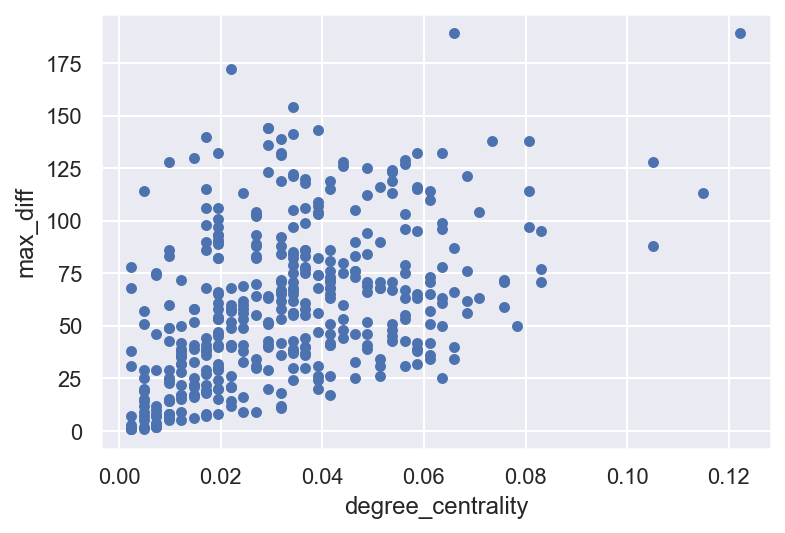

In [69]:
from nams.solutions.hubs import dc_node_order

dc_node_order(G)

The somewhat positive correlation between the degree centrality might tell us that this trend holds true.
A further applied question would be to ask what behaviour of these nodes would give rise to this pattern.
Are these nodes actually exhibit staff?
Or is there some other reason why they are staying so long?
This, of course, would require joining in further information
that we would overlay on top of the graph
(by adding them as node or edge attributes)
before we might make further statements.

## Reflections

In this chapter, we defined a metric of node importance: the degree centrality metric.
In the example we looked at, it could help us identify
potential infectious agent superspreaders in a disease contact network.
In other settings, it might help us spot:

- message amplifiers/influencers in a social network, and 
- potentially crowded airports that have lots of connections into and out of it (still relevant to infectious disease spread!)
- and many more!

What other settings can you think of in which the number of neighbors that a node has can become
a metric of importance for the node?

## Solutions

Here are the solutions to the exercises above.

In [70]:
from nams.solutions import hubs
import inspect

print(inspect.getsource(hubs))

"""Solutions to Hubs chapter."""

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import nxviz as nv
# from nxviz import annotate

from nams import ecdf


def rank_ordered_neighbors(G):
    """
    Uses a pandas Series to help with sorting.
    """
    s = pd.Series({n: len(list(G.neighbors(n))) for n in G.nodes()})
    return s.sort_values(ascending=False)


def rank_ordered_neighbors_original(G):
    """Original implementation of rank-ordered number of neighbors."""
    return sorted(G.nodes(), key=lambda x: len(list(G.neighbors(x))), reverse=True)


def rank_ordered_neighbors_generator(G):
    """
    Rank-ordered generator of neighbors.

    Contributed by @dgerlanc.

    Ref: https://github.com/ericmjl/Network-Analysis-Made-Simple/issues/75
    """
    gen = ((len(list(G.neighbors(x))), x) for x in G.nodes())
    return sorted(gen, reverse=True)


def ecdf_degree_centrality(G):
    """ECDF of degree centrality."""
    x, y = ecdf(list(nx.degree_centrality